In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams.update({'pdf.fonttype': 'truetype'})

In [2]:
def get_coverage_from_file(dataset_name, algo_name, location='../experiment_output_coverage', 
                        repeat=0, col=10, max_length=30, max_components=50):
    train_risks = np.array([])
    test_risks = np.array([])
    num_components = np.array([])
    file_name = dataset_name+'_'+algo_name + '_realkd_col_'+str(col)+'_rep'+str(repeat)+'.txt'
    file_path = location+'/'+dataset_name+'/'+ file_name
    try:
        f = open(file_path, 'r')
    except Exception as e:
        print(e)
        print(file_path, 'does not exist')
        return train_risks, test_risks, num_components
    j=-1
    for line in f:
        if 'iteration' in line:
            j+=1
            if j>29:
                break
            first=True
            if j!=0:
                num_components = np.append(num_components, components)
            components = 0
        words=line.split(' ')
        if 'coverage' in line and first:
            train_risks=np.append(train_risks, float(words[-1]))
            first=False
        elif 'coverage' in line and not first:
            test_risks = np.append(test_risks, float(words[-1]))
        if 'if' in line:
            components += line.count('=')+1
    return train_risks, test_risks, num_components

In [3]:
get_coverage_from_file('titanic', 'xgb_keep_')

(array([229., 117.,  36., 256.,  19.,  75.,  24.,  85.,  27.,  27., 298.,
          1.,   3.,  91.,   3.,  13., 121.,   2.,  26.,  29.,  32.,  10.,
         29.,  53.,  23.,   4.,  48.,   2.,   2.]),
 array([229., 224., 224., 224., 115., 115., 115., 115., 248., 248., 248.,
         77., 115., 115.,  77.,  77.,  77.,  77.,  77.,  77.,  77.,  77.,
         77.,  77.,  77.,  77.,  77.,  77.,  77.]),
 array([ 16.,  22.,  30.,  36.,  48.,  60.,  74.,  85.,  93., 107., 113.,
        126., 142., 151., 163., 177., 185., 199., 207., 215., 227., 237.,
        247., 261., 273., 287., 299., 313.]))

In [4]:
datasets = ['titanic','tic-tac-toe','iris','breast_cancer','load_wine',
            'IBM_HR',
            'insurance','make_friedman1',
            'make_friedman2','make_friedman3','wage', 'Demographics','gdp','used_cars','load_diabetes',
            'boston','world_happiness_indicator',
            'covid_vic','bicycle','smoking']
algo_names = ['mwg_boosting_',
    'gpe_boosting_', 
    'xgb_keep_', ]
cols=[10, 10, 10, 5, 10, 
        3, #10, 10, 5, 5, 3,
        10, 4, 10, 10, 10,
       2, 20, 10, 5, 4, 10, 
        10, 10, 10,]
repeats=[1]*34

In [5]:
def get_all_coverage(dataset_name, algo_name, location='../experiment_output_coverage',
                 repeat=1, col=10, max_length=30, max_components=50):
    train_risks=np.array([])
    test_risks=np.array([])
    num_components=np.array([])
    for i in range(repeat):
        train, test, num = get_coverage_from_file(dataset_name, algo_name, location=location, repeat=i, col=col,
                                              max_length=max_length, max_components=max_components)
        train_risks = np.append(train_risks, train)
        test_risks = np.append(test_risks, test)
#         num_components = np.append(num_components, components)
    return train_risks, test_risks
#            np.reshape(num_components, (-1, max_components))

In [6]:
get_all_coverage('titanic', 'gpe_boosting_')

(array([229., 117.,  36.,  31.,   1.,   2.,   2.,  11.,   4.,   4.,   8.,
         10.,  10.,  11.,   1.,  51.,   4.,   6.,  15.,   3.,   3.,   3.,
          7.,  16.,   1.,  24.,  12.,  21.,  28.]),
 array([229., 117.,  36.,  19.,  19.,  19.,  19.,  19.,  19.,  10.,  10.,
         10.,  10.,  11.,  12.,  12.,  12.,  12.,  12.,   3.,   3.,   3.,
          8.,   8., 224., 224.,   8.,   8.,  30.]))

In [7]:
def all_coverage(datasets, algo_names):
    train_risks={}
    test_risks={}
    for i in range(len(datasets)):
        train_risks[datasets[i]]={}
        test_risks[datasets[i]]={}
        for algo in algo_names:
            train, test=get_all_coverage(datasets[i], algo, col=cols[i])
            train_risks[datasets[i]][algo]=train
            test_risks[datasets[i]][algo]=test
    return train_risks, test_risks

coverages=all_coverage(datasets, algo_names)
coverages

({'titanic': {'mwg_boosting_': array([366., 269., 313., 403., 326., 514., 346., 117., 443., 147., 315.,
          386., 457., 105., 229., 252., 112., 128., 457., 182., 282., 403.,
          569., 132., 293.,  77., 144., 270.,  66.]),
   'gpe_boosting_': array([229., 117.,  36.,  31.,   1.,   2.,   2.,  11.,   4.,   4.,   8.,
           10.,  10.,  11.,   1.,  51.,   4.,   6.,  15.,   3.,   3.,   3.,
            7.,  16.,   1.,  24.,  12.,  21.,  28.]),
   'xgb_keep_': array([229., 117.,  36., 256.,  19.,  75.,  24.,  85.,  27.,  27., 298.,
            1.,   3.,  91.,   3.,  13., 121.,   2.,  26.,  29.,  32.,  10.,
           29.,  53.,  23.,   4.,  48.,   2.,   2.])},
  'tic-tac-toe': {'mwg_boosting_': array([766., 381., 256., 244., 319., 240., 345., 252., 149., 381., 197.,
          766., 238., 232.,  64., 328., 220., 320., 329., 158., 182., 156.,
          244., 126., 104., 203., 766.,  60., 345.]),
   'gpe_boosting_': array([381.,  62.,  73., 101.,  49., 153.,  45.,  72.,  57.,  49.

In [8]:
coverages[1]['titanic']['gpe_boosting_']

array([229., 117.,  36.,  19.,  19.,  19.,  19.,  19.,  19.,  10.,  10.,
        10.,  10.,  11.,  12.,  12.,  12.,  12.,  12.,   3.,   3.,   3.,
         8.,   8., 224., 224.,   8.,   8.,  30.])

In [9]:
datapoints = {'titanic':1043,'tic-tac-toe':958,'iris':150,'breast_cancer': 569,'load_wine': 178,
              'IBM_HR': 1470, 'insurance':1338,'fried1':2000,'fried2':10000,'fried3':5000,
              'make_friedman1':1000,'make_friedman2':5000,'make_friedman3':2000,
              'wage':1379,'Demographics':8992,'gdp':35,'used_cars':1770,'diabetes':442,
              'liver':345, 'adult':30162, 'magic':19020,'digits5':5873,'banknote':1372,
              'GenderRecognition':3168,'telco_churn':7043,'who_life_expectancy':1649,
              'mobile_prices':2000,'videogamesales':16327,'suicide_rates_cleaned':27820,
              'red_wine_quality':1599,
            'boston':506,'world_happiness_indicator':156,'covid_vic':85,'covid':225,
              'bicycle':122,'ships':34,'smoking':36}

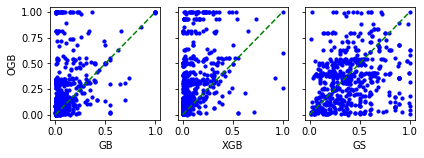

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(6,2.3), sharey=True, tight_layout=True, squeeze=False)
gpe_coverage=[]
gpe_orth_coverage=[]

for k in coverages[0]:
    number=1
    for name in datapoints:
        if name in k:
            number = datapoints[name]
            break
#         print(k, number)
    for j in range(0,len(coverages[0][k]['gpe_boosting_'])):
        gpe_coverage.append(coverages[0][k]['gpe_boosting_'][j]/number/0.8)
        gpe_orth_coverage.append(coverages[1][k]['gpe_boosting_'][j]/number/0.8)
# axs[0].set_aspect('equal', adjustable='box')
axs[0,0].plot([0,1],[0,1], 'g--')
axs[0,0].set_xlabel('GB')
axs[0,0].set_ylabel('OGB')
axs[0,0].scatter(gpe_coverage, gpe_orth_coverage,c='b',s=10,marker='o')

xgb_coverage=[]
xgb_orth_coverage=[]
for k in coverages[0]:
    number=1
    for name in datapoints:
        if name in k:
            number = datapoints[name]
            break
#         print(k, number)
    for j in range(1,len(coverages[0][k]['xgb_keep_'])):
        xgb_coverage.append(coverages[0][k]['xgb_keep_'][j]/number/0.8)
        xgb_orth_coverage.append(coverages[1][k]['xgb_keep_'][j]/number/0.8)
axs[0,1].plot([0,1],[0,1], 'g--')
axs[0,1].set_xlabel('XGB')
axs[0,1].scatter(xgb_coverage, xgb_orth_coverage,c='b',s=10,marker='o')


mwg_coverage=[]
mwg_orth_coverage=[]
for k in coverages[0]:
    number=1
    for name in datapoints:
        if name in k:
            number = datapoints[name]
            break
    for j in range(1,len(coverages[0][k]['mwg_boosting_'])):
#             print(results[k][0][j]/number/0.8)
        mwg_coverage.append(coverages[0][k]['mwg_boosting_'][j]/number/0.8)
        mwg_orth_coverage.append(coverages[1][k]['mwg_boosting_'][j]/number/0.8)
axs[0,2].plot([0,1],[0,1], 'g--')
axs[0,2].set_xlabel('GS')
axs[0,2].scatter(mwg_coverage, mwg_orth_coverage,c='b',s=10,marker='o')
fig.savefig('coverage.pdf')

In [11]:
sum(np.array(gpe_coverage)<=np.array(gpe_orth_coverage))/len(gpe_coverage)

0.7965517241379311

In [12]:
sum(np.array(xgb_coverage)<=np.array(xgb_orth_coverage))/len(xgb_coverage)

0.8964285714285715

In [13]:
sum(np.array(mwg_coverage)<=np.array(mwg_orth_coverage))/len(mwg_coverage)

0.4607142857142857

In [14]:
c = 0
d=0
for i in range(len(gpe_coverage)):
    if gpe_coverage[i] > gpe_orth_coverage[i]:
        c+=1
    if gpe_orth_coverage[i]>0.5 and gpe_coverage[i]<0.5:
        d+=1
print((len(gpe_orth_coverage)-c)/len(gpe_orth_coverage))
# print(d/len(gpe_orth_coverage))
# print(c)

0.7965517241379311


In [15]:
c = 0
d=0
for i in range(len(xgb_orth_coverage)):
    if xgb_coverage[i] > xgb_orth_coverage[i]:
        c+=1
    if xgb_orth_coverage[i]>0.5 and xgb_coverage[i]<0.5:
        d+=1
print((len(xgb_orth_coverage)-c)/len(xgb_orth_coverage))
# print(d/len(xgb_orth_coverage))
# print(c)

0.8964285714285715


In [16]:
c = 0
d=0
for i in range(len(mwg_orth_coverage)):
    if mwg_coverage[i] > mwg_orth_coverage[i]:
        c+=1
    if mwg_orth_coverage[i]>0.5 and mwg_coverage[i]<0.5:
        d+=1
print((len(mwg_orth_coverage)-c)/len(mwg_orth_coverage))
# print(d/len(mwg_orth_coverage))
# print(c)

0.4607142857142857


In [17]:
from scipy.stats import ttest_rel

In [18]:
delta = 0.05
noh = 6
delta_corr = delta/noh
margins = [0, 0.001, 0.01]

In [19]:
tests = [['gpe_cov < orth_cov', gpe_coverage, gpe_orth_coverage],
         ['xgb_cov < orth_cov', xgb_coverage, xgb_orth_coverage],
         ['mwg_cov > orth_cov', mwg_orth_coverage, mwg_coverage],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

gpe_cov < orth_cov
margin 0: 	9.919062249814711e-34 	 True
margin 0.001: 	2.4057157698188173e-33 	 True
margin 0.01: 	5.978271053747289e-30 	 True

xgb_cov < orth_cov
margin 0: 	2.1212285776857195e-57 	 True
margin 0.001: 	5.366692876222362e-57 	 True
margin 0.01: 	2.1601582800120643e-53 	 True

mwg_cov > orth_cov
margin 0: 	1.0615590456117245e-05 	 True
margin 0.001: 	1.495791272569394e-05 	 True
margin 0.01: 	0.0002560211172293451 	 True

